In [1]:
import pandas as pd
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check

from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing


In [2]:
sales_data=pd.read_excel("salesdata.xls")

In [3]:
sales_data.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [4]:
print(f'{sales_data.shape[0]} samples and {sales_data.shape[1]} features in the insurance  dataset.')

9994 samples and 21 features in the insurance  dataset.


### Understanding the data

In [5]:
#view data types
sales_data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [6]:
#view statistical information.
sales_data.describe([0.99])

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
99%,9894.070000,98115.000000,2481.694600,11.000000,0.800000,580.657882
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#information about data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
sales_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Data mining 

In [9]:
#missing data
total = sales_data.isnull().sum().sort_values(ascending=False)
percent = (sales_data.isnull().sum()/sales_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total missing values', 'Percent'])
missing_data.head(20)

,Total missing values,Percent
Row ID,0,0.0
Postal Code,0,0.0
Discount,0,0.0
Quantity,0,0.0
Sales,0,0.0
Product Name,0,0.0
Sub-Category,0,0.0
Category,0,0.0
Product ID,0,0.0
Region,0,0.0


In [10]:
#checking for duplicate values
sales_data[sales_data.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [11]:
# checking Unique count
sales_data.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [12]:
delta = sales_data['Ship Date'] - sales_data['Order Date']
sales_data['Days to ship'] = delta.dt.days

In [13]:
sales_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Days to ship'],
      dtype='object')

In [14]:
# Filtering dataset of furniture sales
furniture_data = sales_data[sales_data['Category'] == 'Furniture']

## Exploratory Data Analysis (EDA)

### 1) Seperating categorical and numerical columns

In [15]:
def separate_data_types(data):
    categorical=[]
    continuous=[]
    for column in data.columns:
        if data[column].nunique()<10:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical,continuous

In [16]:
categorical,continuous=separate_data_types(furniture_data)
from tabulate import tabulate
table=[categorical,continuous]
print(tabulate({"categorical":categorical,
                "continuous":continuous},headers=["categorical","continuous"]))

categorical    continuous
-------------  -------------
Ship Mode      Row ID
Segment        Order ID
Country        Order Date
Region         Ship Date
Category       Customer ID
Sub-Category   Customer Name
Days to ship   City
               State
               Postal Code
               Product ID
               Product Name
               Sales
               Quantity
               Discount
               Profit


In [17]:
continuous.remove("Order ID")
categorical.append("Order ID")
continuous.remove("Customer ID")
categorical.append("Customer ID")
continuous.remove("Customer Name")
categorical.append("Customer Name")
continuous.remove("City")
categorical.append("City")
continuous.remove("State")
categorical.append("State")
continuous.remove("Product ID")
categorical.append("Product ID")
continuous.remove("Product Name")
categorical.append("Product Name")
categorical.remove("Days to ship")
continuous.append("Days to ship")

In [18]:
from tabulate import tabulate
table = [categorical,continuous]
print(tabulate({'categorical':categorical,
                'continuous': continuous}, headers = ['categorical','continuous']))

categorical    continuous
-------------  ------------
Ship Mode      Row ID
Segment        Order Date
Country        Ship Date
Region         Postal Code
Category       Sales
Sub-Category   Quantity
Order ID       Discount
Customer ID    Profit
Customer Name  Days to ship
City
State
Product ID
Product Name


## Identify Outliers

In [19]:
import numpy as np

In [20]:
print('row and columns before removing outliers:',furniture_data.shape)
print('wait till shape after removing outlier is printed...')

def myOutliers(data1,col):
    q3=np.quantile(data1[col],0.75)
    q1=np.quantile(data1[col],0.25)
    iqr=q3-q1
    
    global mylist
    global my_outlier_data
    
    lower_range=q1-1.5*iqr
    upper_range=q3+1.5*iqr 
    
    print('the lower range of',col,'is',lower_range)
    print('the upper range of',col,'is',upper_range)
    
    mylist=[x for x in data1[col] if ((x<lower_range)|(x>upper_range))]
    print('total outliers in',col,'are',len(mylist))
    my_outlier_data=data1.loc[data1[col].isin(mylist)]

row and columns before removing outliers: (2121, 22)
wait till shape after removing outlier is printed...


In [21]:
for i in continuous:
    print('i is',i)
    myOutliers(furniture_data,i)
    print('***************************************************')

i is Row ID
the lower range of Row ID is -4881.0
the upper range of Row ID is 14983.0
total outliers in Row ID are 0
***************************************************
i is Order Date
the lower range of Order Date is 2012-06-11T12:00:00.000000000
the upper range of Order Date is 2020-04-26T12:00:00.000000000
total outliers in Order Date are 0
***************************************************
i is Ship Date
the lower range of Ship Date is 2012-06-18T00:00:00.000000000
the upper range of Ship Date is 2020-04-29T00:00:00.000000000
total outliers in Ship Date are 0
***************************************************
i is Postal Code
the lower range of Postal Code is -78045.5
the upper range of Postal Code is 190878.5
total outliers in Postal Code are 0
***************************************************
i is Sales
the lower range of Sales is -535.152
the upper range of Sales is 1017.3600000000001
total outliers in Sales are 164
***************************************************
i is Qu

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

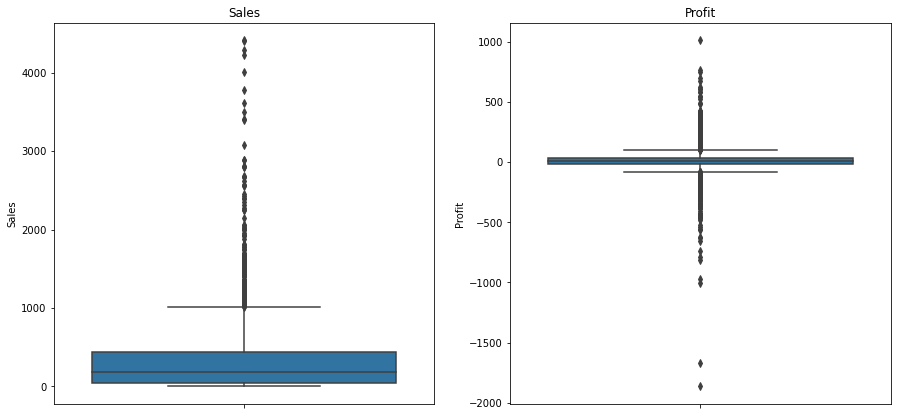

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(y=furniture_data['Sales'],ax=ax[0]).set(title='Sales')
sns.boxplot(y=furniture_data['Profit'],ax=ax[1]).set(title='Profit')

plt.show()

### Univariate Analysis

<AxesSubplot:>

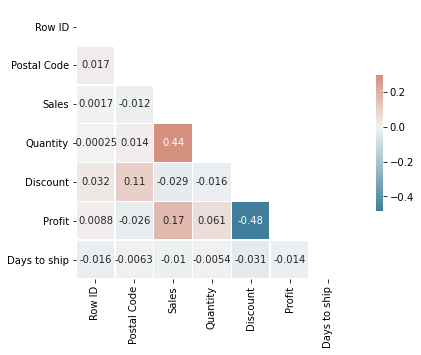

In [24]:
corr = furniture_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

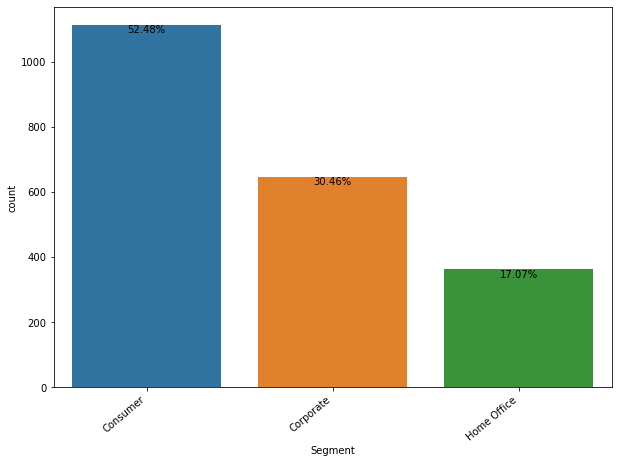

In [25]:
fig,ax= plt.subplots(figsize=(10,7))
ax=sns.countplot(x=furniture_data['Segment'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

count=len(furniture_data['Segment'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count)*100,2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='top')
    
plt.show()

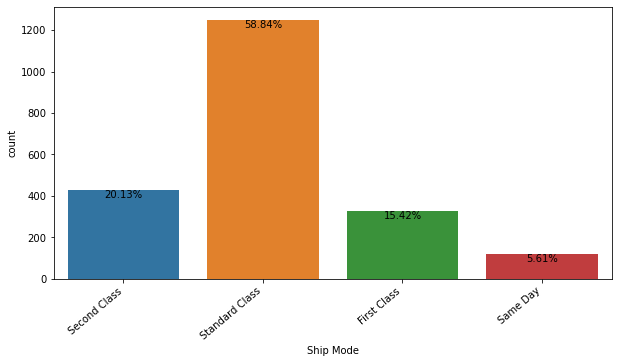

In [26]:
fig,ax= plt.subplots(figsize=(10,5))
ax=sns.countplot(x=furniture_data['Ship Mode'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

count=len(furniture_data['Ship Mode'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count)*100,2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='top')
    
plt.show()

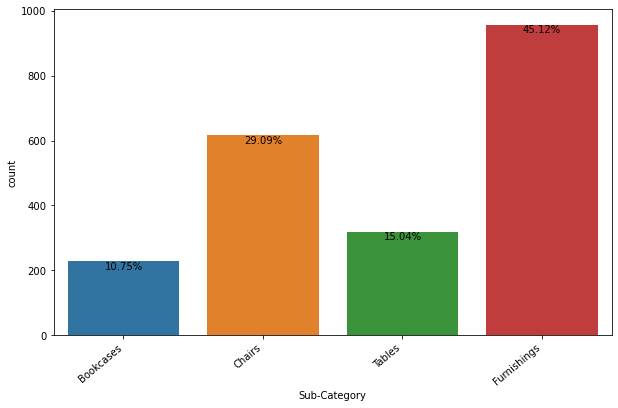

In [27]:
fig,ax= plt.subplots(figsize=(10,6))
ax=sns.countplot(x=furniture_data['Sub-Category'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

count=len(furniture_data['Sub-Category'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count)*100,2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='top')
    
plt.show()

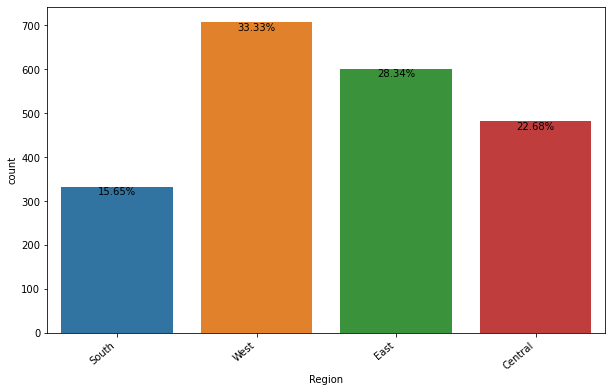

In [28]:
fig,ax= plt.subplots(figsize=(10,6))
ax=sns.countplot(x=furniture_data['Region'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
count=len(furniture_data['Region'])
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count)*100,2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='top')
plt.show()

### Bivariate Analysis

In [29]:
def annotate(bars,ax=ax):
    for bar in bars:
        height = bar.get_height()
        height = round(height,2)
        label_x_pos = bar.get_x() + bar.get_width() / 2
        ax.text(label_x_pos, height, s=f'{height}', ha='center',
        va='bottom')

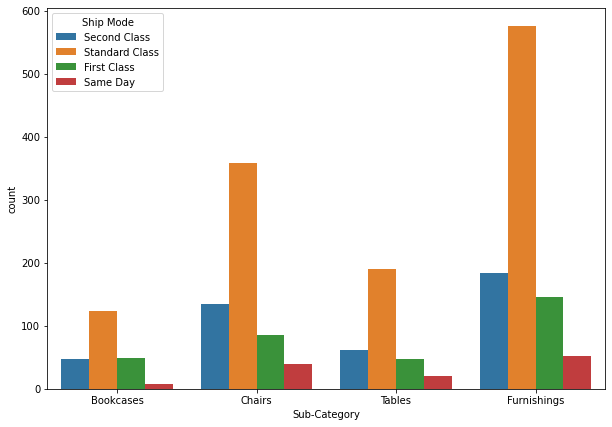

In [30]:
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(x= 'Sub-Category', hue='Ship Mode', data=furniture_data )
plt.show()

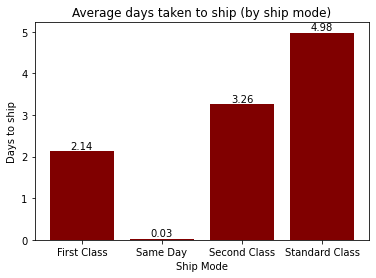

In [31]:
df = furniture_data.groupby('Ship Mode')['Days to ship'].mean()
plt.bar(df.index, df.values,color = 'g')

bars = plt.bar(df.index, df.values,color = 'maroon')
annotate(bars,plt)
    
plt.title('Average days taken to ship (by ship mode)')
plt.xlabel('Ship Mode')
plt.ylabel('Days to ship')
plt.show()

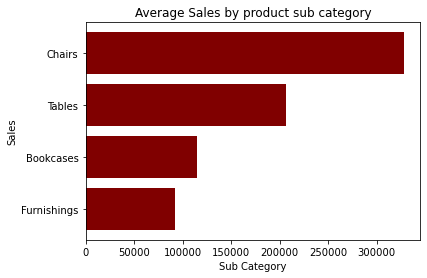

In [32]:
df = furniture_data.groupby('Sub-Category')['Sales'].sum().sort_values()

plt.barh(df.index, df.values,color = 'maroon')
    
plt.title('Average Sales by product sub category')
plt.xlabel('Sub Category')
plt.ylabel('Sales')
plt.show()

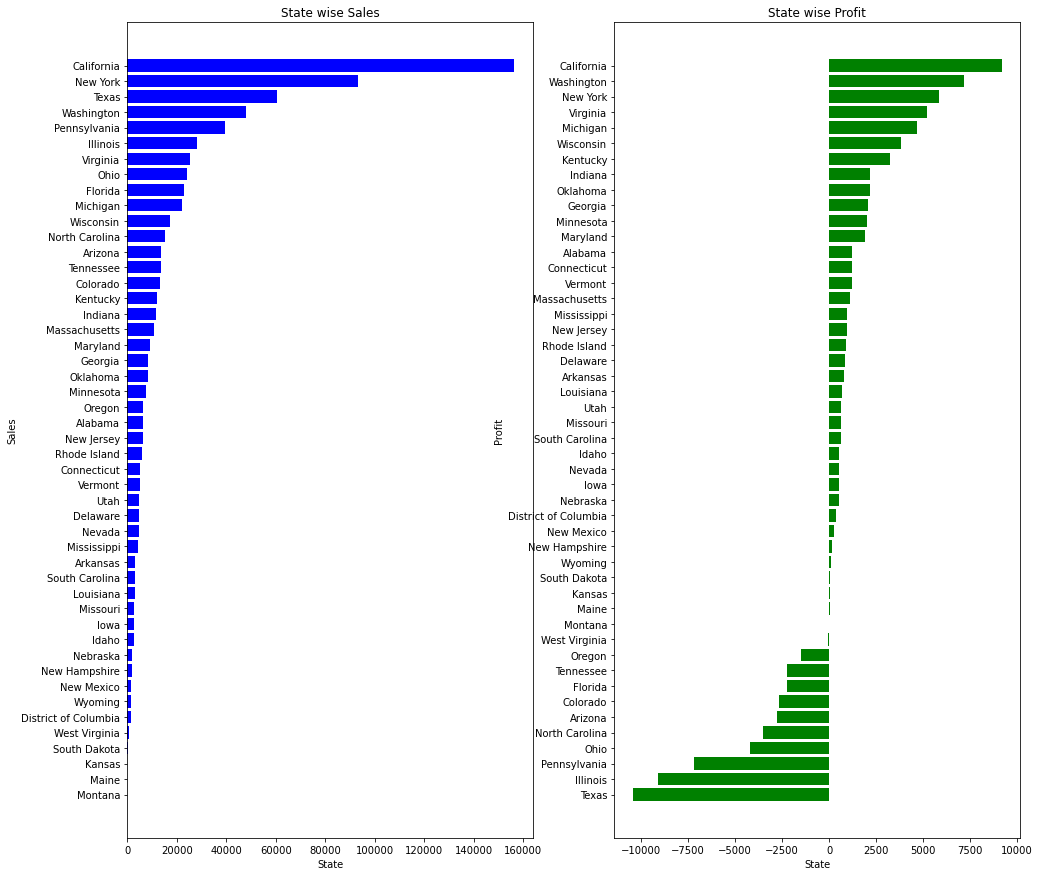

In [33]:
df = furniture_data.groupby('State')['Sales'].sum().sort_values()

fig, [ax1,ax2] = plt.subplots(1,2,figsize=(16,15))
ax1.barh(df.index, df.values,color = 'b')
    
ax1.set_title('State wise Sales')
ax1.set_xlabel('State')
ax1.set_ylabel('Sales')

df = furniture_data.groupby('State')['Profit'].sum().sort_values()

ax2.barh(df.index, df.values,color = 'g')

    
ax2.set_title('State wise Profit')
ax2.set_xlabel('State')
ax2.set_ylabel('Profit')
plt.show()

### Multivariate Analysis

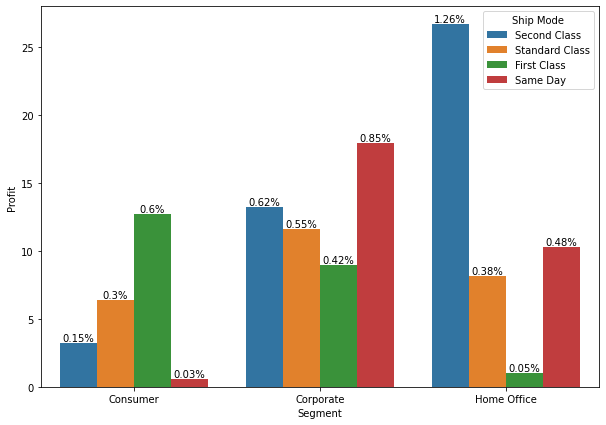

In [34]:
fig,ax= plt.subplots(figsize=(10,7))
sns.barplot(x=furniture_data['Segment'],y=furniture_data['Profit'],hue=furniture_data['Ship Mode'],ci=None,ax=ax)

count=len(furniture_data['Sales'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count)*100,2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='bottom')
    
plt.show()

#### Dropping the unneceesary columns 

In [35]:
columns = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',  'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit','Days to ship']
furniture = furniture_data.drop(columns,axis = 1)

In [36]:
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [37]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])

furniture.sort_values(by='Order Date')

furniture=furniture.set_index('Order Date')


furniture=furniture[['Sales']]


In [38]:
furniture.head()

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775
2014-06-09,48.8600
2014-06-09,1706.1840


In [39]:

sales = furniture.resample('M').mean()#M stands for months # w stands for week
sales

,Sales
Order Date,
2014-01-31,312.126250
2014-02-28,262.808286
2014-03-31,441.635030
2014-04-30,305.570654
2014-05-31,288.032792
2014-06-30,440.204187
2014-07-31,327.910636
2014-08-31,305.014438
2014-09-30,425.294300


<AxesSubplot:xlabel='Order Date'>

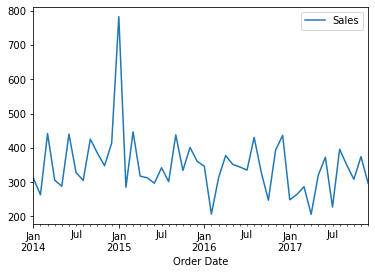

In [40]:
sales.plot()

###  Perform some visual inspections about the data. 

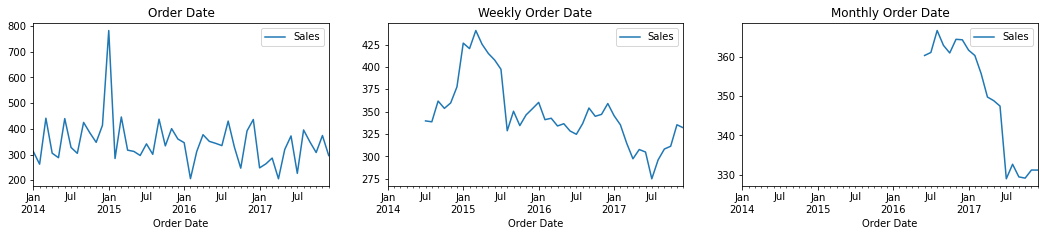

In [41]:
fig, ax=plt.subplots(1,3, figsize=(18,3))
col = "Order Date"
ax[0].set_title(col)
ax[1].set_title("Weekly " + col)
ax[2].set_title("Monthly "+ col)
sales.plot(ax=ax[0])
sales.rolling(window=7).mean().plot(ax=ax[1])
sales.rolling(window=30).mean().plot(ax=ax[2])
plt.show()

In [42]:

from statsmodels.tsa.seasonal import seasonal_decompose


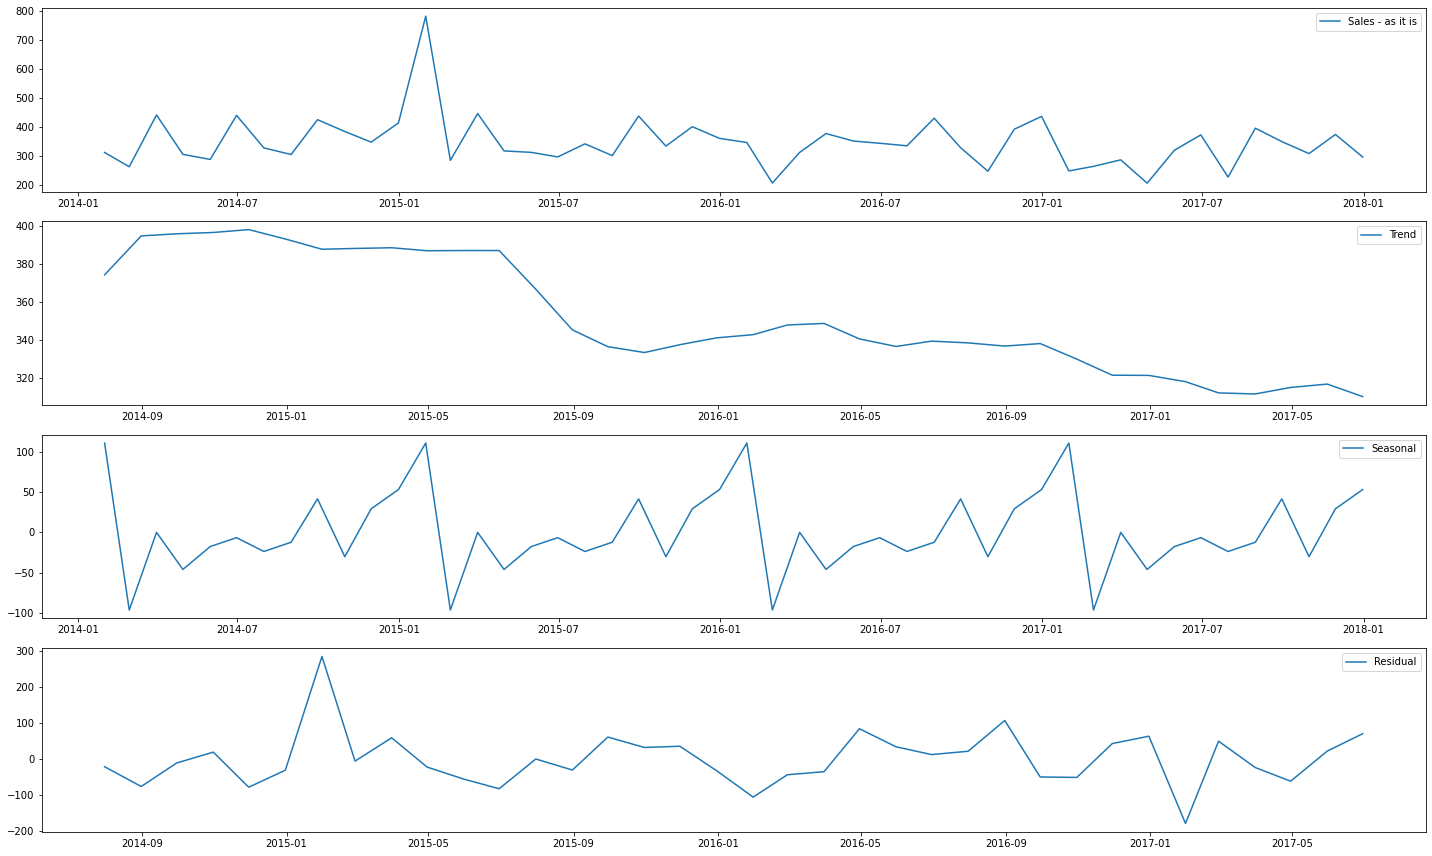

In [43]:
decomposition=seasonal_decompose(sales)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(sales,label='Sales - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In [44]:
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

In [45]:
# dickey-fuller test for stationarity
def checkStationarity():
    pvalue = adfuller(data)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [46]:
res = adfuller(sales)
if res[1] < 0.05:
    print('data is stationary')
else:
    print('data is not stationary')
print(res[1])

data is stationary
9.093398510006879e-10


#### d=0 because data is stationry

## Moving Average

In [47]:
lags = 4
moving_avg = sales.rolling(window=lags).mean()

In [48]:
df_ts = pd.DataFrame({'actual':sales['Sales'], 'ma':moving_avg['Sales']})
print(df_ts)

                actual          ma
Order Date                        
2014-01-31  312.126250         NaN
2014-02-28  262.808286         NaN
2014-03-31  441.635030         NaN
2014-04-30  305.570654  330.535055
2014-05-31  288.032792  324.511690
2014-06-30  440.204187  368.860666
2014-07-31  327.910636  340.429567
2014-08-31  305.014438  340.290513
2014-09-30  425.294300  374.605890
2014-10-31  384.507719  360.681773
2014-11-30  347.820527  365.659246
2014-12-31  414.134682  392.939307
2015-01-31  782.662773  482.281425
2015-02-28  284.943091  457.390269
2015-03-31  446.420821  482.040342
2015-04-30  317.445409  457.868024
2015-05-31  312.498350  340.326918
2015-06-30  296.699192  343.265943
2015-07-31  341.860500  317.125863
2015-08-31  301.206006  313.066012
2015-09-30  437.883717  344.412354
2015-10-31  334.072875  353.755774
2015-11-30  401.049773  368.553093
2015-12-31  360.715925  383.430572
2016-01-31  346.488318  360.581723
2016-02-29  206.607947  328.715491
2016-03-31  312.2217

In [49]:
df_ts.actual.head(lags).mean()

330.5350549658674

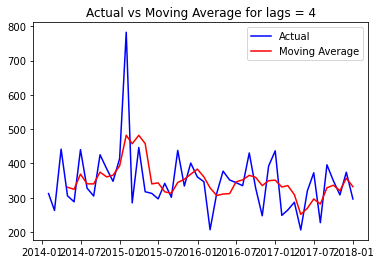

In [50]:
# plot the actual and moving average for comparison
plt.plot(df_ts.actual, color='blue',label = 'Actual')
plt.plot(df_ts.ma, color='red', label = 'Moving Average')
plt.title('Actual vs Moving Average for lags = ' + str(lags))
plt.legend()
plt.show()

## Exponential Smoothing

In [51]:
data = sales['Sales']

In [52]:
from statsmodels.tsa.statespace.tools import diff


In [53]:
from pmdarima.arima import auto_arima

In [54]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [55]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing

In [56]:
sales

,Sales
Order Date,
2014-01-31,312.126250
2014-02-28,262.808286
2014-03-31,441.635030
2014-04-30,305.570654
2014-05-31,288.032792
2014-06-30,440.204187
2014-07-31,327.910636
2014-08-31,305.014438
2014-09-30,425.294300


data is stationary
9.093398510006879e-10


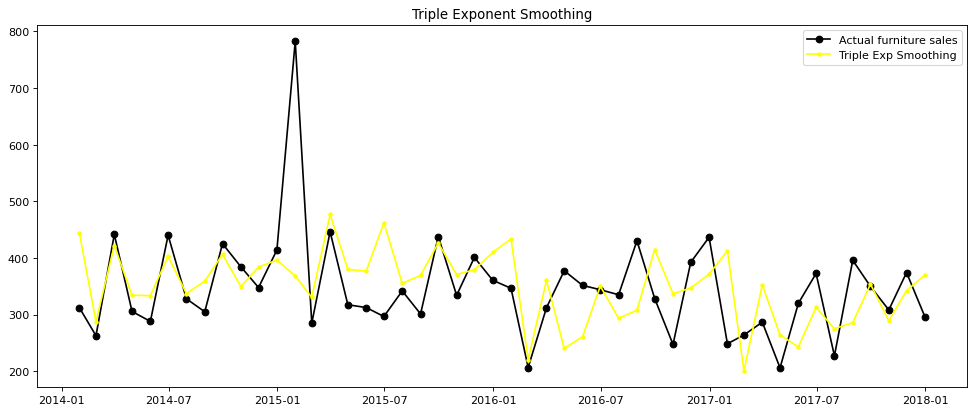

In [57]:
### Triple Exponent Smoothing

# build model
model = ExponentialSmoothing(sales,trend='add',seasonal='add',seasonal_periods=12).fit()

# plot the actual and triple smoothing values
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(sales, marker='o',color='black',label='Actual furniture sales')
plt.plot(model.fittedvalues,marker='.',color='yellow',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

model.forecast(12)



# Stationarity check
res = adfuller(sales)
if res[1] < 0.05:
    print('data is stationary')
else:
    print('data is not stationary')
print(res[1])

In [58]:

sales=pd.DataFrame(model.fittedvalues)
sales.rename(columns = {0:'Sales'}, inplace = True)

In [59]:
sales

,Sales
Order Date,
2014-01-31,443.865613
2014-02-28,287.654654
2014-03-31,421.922031
2014-04-30,334.339930
2014-05-31,333.444788
2014-06-30,402.892026
2014-07-31,337.124968
2014-08-31,359.112627
2014-09-30,406.450565


### Plot ACF and PACF

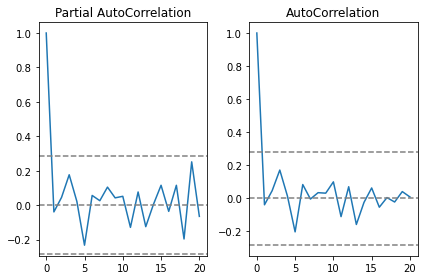

In [60]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(data.dropna(), nlags=20)
lag_pacf = pacf(data.dropna(), nlags=20, method='ols')

# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

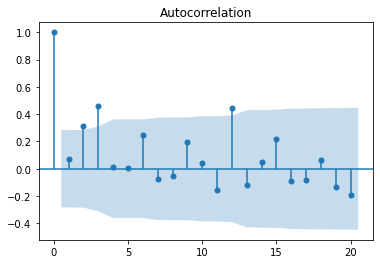

In [61]:
plot_acf(sales,lags=20);

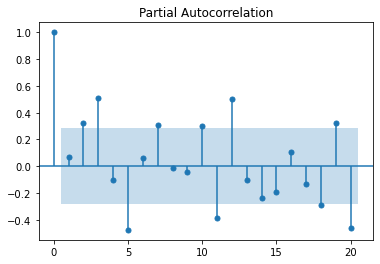

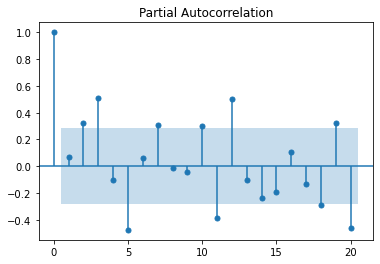

In [62]:
plot_pacf(sales,lags=20)

In [63]:
# split the data into train and test
ss = int(0.8 * len(sales))

train = sales.iloc[:ss]
test = sales.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 38, test = 10


## SARIMA

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset
import itertools

In [65]:
p=1; q=1; d=0
m3 = sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
print(m3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   38
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -202.186
Date:                            Wed, 11 May 2022   AIC                            414.371
Time:                                    17:40:23   BIC                            422.559
Sample:                                01-31-2014   HQIC                           417.284
                                     - 02-28-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9713      0.034     28.197      0.000       0.904       1.039
ma.L1         -0.4691      0.169   

In [69]:
actual = []; pred = []
for i in range(len(predictions)):
    actual.append(test["Sales"][i])
    pred.append(predictions[i])
start = len(train)
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m3.predict(start=start,end=end,dynamic=True)

df_res = pd.DataFrame({'actual':actual, 'predicted':predictions})
df_res['err'] = df_res.actual - df_res.predicted
df_res

start = 38, end = 47


,actual,predicted,err
2017-03-31,352.564107,365.885010,-13.320903
2017-04-30,264.074071,274.781895,-10.707825
2017-05-31,243.025887,282.106354,-39.080467
2017-06-30,312.610438,358.751159,-46.140721
2017-07-31,275.219635,291.026113,-15.806478
2017-08-31,285.760639,308.348945,-22.588306
2017-09-30,353.861475,375.442117,-21.580642
2017-10-31,289.074576,319.197914,-30.123338
2017-11-30,342.373720,337.165894,5.207826
2017-12-31,369.860364,359.697157,10.163207


<AxesSubplot:>

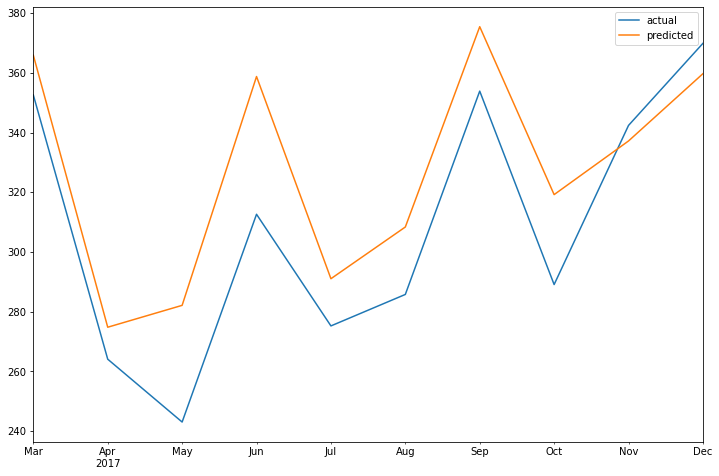

In [70]:
# plot
df_res[['actual','predicted']].plot(figsize=(12,8))

In [71]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m3.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

[0.0668355]
Fail-to-Reject H0. Good model


In [72]:
# MSE
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
msg = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

SARIMA Model. Order=(1,0,1)
	MSE = 621.198123856245
	RMSE = 24.923846489983145


Text(0.5, 1.0, 'SARIMA Model. Order=(1,0,1)')

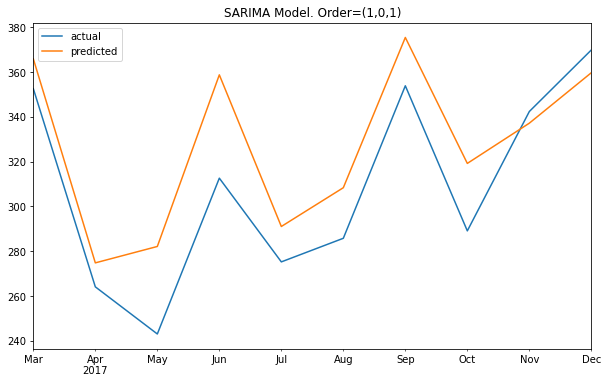

In [73]:
df_res.actual.plot(figsize=(10,6),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

### Forecast the future data using the model

Text(0.5, 1.0, 'SARIMA Model. Order=(1,0,1)')

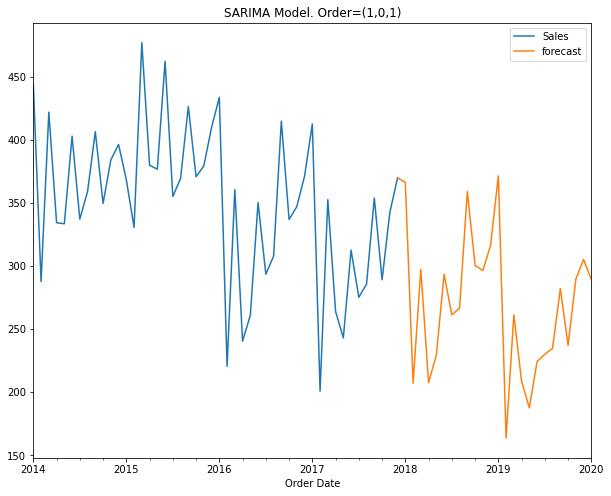

In [74]:
p = 1; d =0 ; q = 1
m3_f = sm.tsa.statespace.SARIMAX(sales,order=(p,d,q),seasonal_order=(p,d,q,24)).fit()
fcast = m3_f.predict(start=end, end=len(sales)+24, typ='levels')
fcast[0]=df_res.iloc[-1,0]

#print(fcast)

sales.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True,label = 'forecast')
plt.title(msg)

In [75]:
sales.head()

,Sales
Order Date,
2014-01-31,443.865613
2014-02-28,287.654654
2014-03-31,421.922031
2014-04-30,334.339930
2014-05-31,333.444788


In [76]:
pwd

'C:\\Users\\Dell\\Untitled Folder 2\\ml_projects'